In [63]:
import perfprof
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

def aupp(handle_data):
    x, y = handle_data
    x_diffs = x[1:] - x[:-1]
    return (x_diffs * y[:-1]).sum()

def make_pp(data, methods_list):
    filtered_data = data.copy()
    filtered_data = filtered_data[~pd.isna(filtered_data["Dataset"])][["Dataset", "Horizon"] + methods_list]
    filtered_data = filtered_data[~pd.isna(filtered_data).any(axis=1)]

    fig, ax = plt.subplots(figsize=(8, 8))
    _, handles = perfprof.perfprof(
        filtered_data.drop(columns=["Dataset", "Horizon"]),
        ['o-'] * 11,
    )

    aupps = [aupp(h[0].get_data()) for h in handles]
    ax.legend(labels=list(filtered_data.columns[2:]))
    display(filtered_data[["Dataset", "Horizon"]])
    return ax, len(filtered_data), aupps, methods_list[np.argmax(aupps)]

data = pd.read_excel("Dashed-Dreams Unified Workflow.xlsx", sheet_name="Time Series", skiprows=[0, 2, 3, 4])
data = data.iloc[:, :26]
# data = data.iloc[:, :16]
data = data[~pd.isna(data).all(axis=1)]
data = data.rename(columns={"Unnamed: 0": "Dataset"})
data["Dataset"] = data["Dataset"].ffill()
data.loc[data["Dataset"] == "ILI", "TimeLLM"] = np.nan
# data.drop(columns=["TimeLLM"], inplace=True)

stats_methods = ["AR(d=0)", "AR(d=1)"]
dl_methods = ["DLinear", "TimesNet", "Linear", "DASH"]
dl_non_dash = ["DLinear", "TimesNet", "Linear"]
tf_methods = ["PatchTST/64", "FEDformer-f", "AutoFormer", "Nonstationary TF"]
fm_methods = ["TimeLLM", "GPT4TS (OFA)", "LLM4TS", "MOMENT"]

data["Best-per-task Stats"] = data[stats_methods].min(axis=1)
data["Best-per-task FM"] = data[fm_methods].min(axis=1)
data["Best-per-task DL"] = data[dl_non_dash].min(axis=1)
data["Best-per-task TF"] = data[tf_methods].min(axis=1)

,Dataset,Horizon
0,ETTh1,96.0
1,ETTh1,192.0
2,ETTh1,336.0
3,ETTh1,720.0
5,ETTh2,96.0
6,ETTh2,192.0
7,ETTh2,336.0
8,ETTh2,720.0
10,ETTm1,96.0
11,ETTm1,192.0


Text(0.5, 1.0, 'Statistical Methods (18 tasks)')

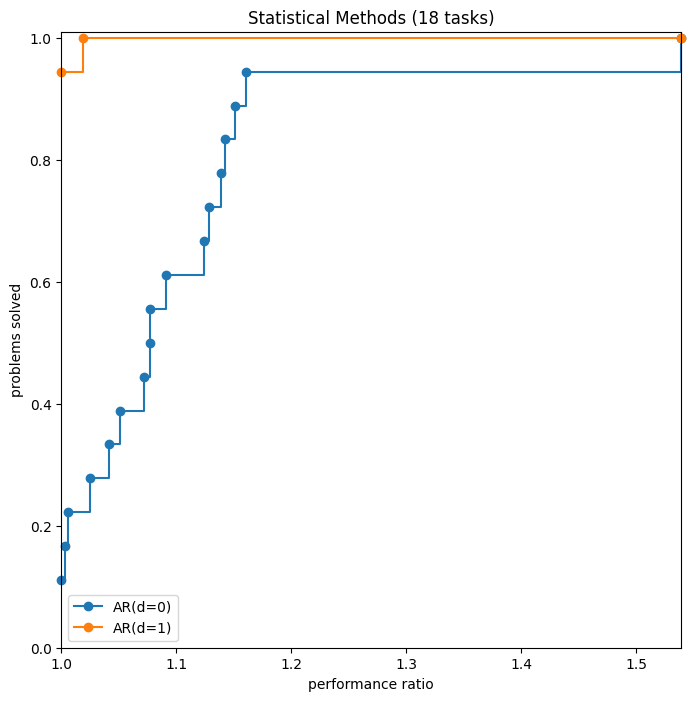

In [54]:
# PP for statistical methods
ax, num_problems, _, best_stats = make_pp(data, stats_methods)
ax.set_title(f"Statistical Methods ({num_problems} tasks)")

,Dataset,Horizon
0,ETTh1,96.0
1,ETTh1,192.0
2,ETTh1,336.0
3,ETTh1,720.0
5,ETTh2,96.0
6,ETTh2,192.0
7,ETTh2,336.0
8,ETTh2,720.0
30,ILI,24.0
31,ILI,36.0


Text(0.5, 1.0, 'Deep Learning Methods (12 tasks)')

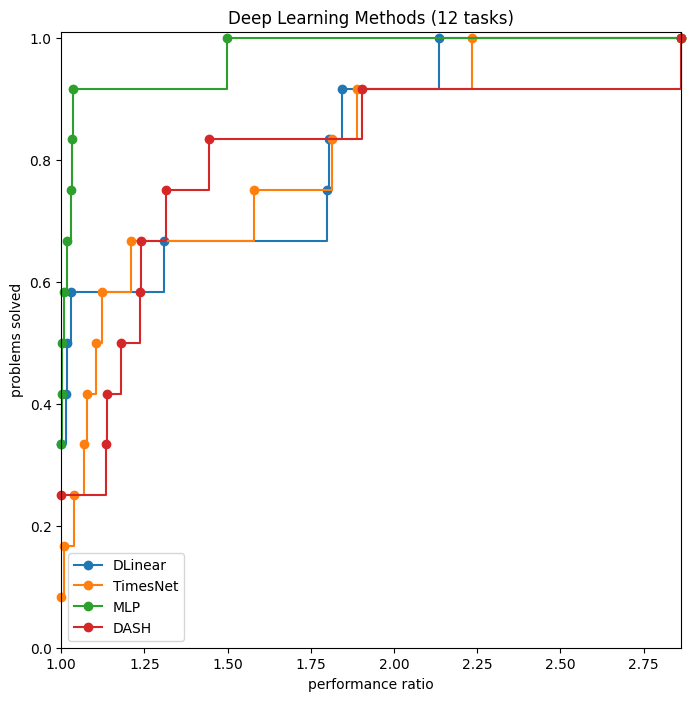

In [56]:
# PP for DL-based methods
ax, num_problems, aupps, best_dl = make_pp(data, dl_methods)
ax.set_title(f"Deep Learning Methods ({num_problems} tasks)")

,Dataset,Horizon
2,ETTh1,336.0
3,ETTh1,720.0
7,ETTh2,336.0
8,ETTh2,720.0
10,ETTm1,96.0
15,ETTm2,96.0
16,ETTm2,192.0
17,ETTm2,336.0
18,ETTm2,720.0
20,Weather,96.0


Text(0.5, 1.0, 'Transformer-based Methods (25 tasks)')

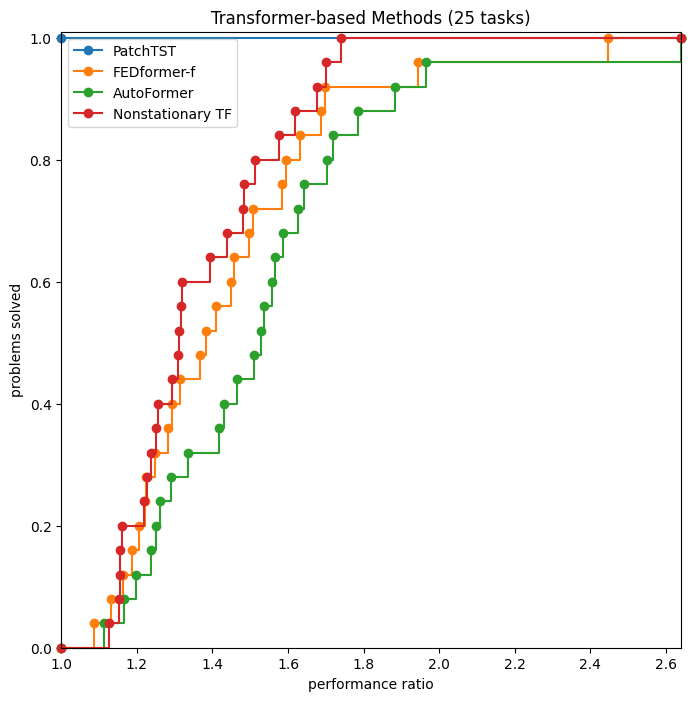

In [57]:
# PP for Transformer-based methods
ax, num_problems, _, best_tf = make_pp(data, tf_methods)
ax.set_title(f"Transformer-based Methods ({num_problems} tasks)")

,Dataset,Horizon
0,ETTh1,96.0
1,ETTh1,192.0
2,ETTh1,336.0
3,ETTh1,720.0
5,ETTh2,96.0
6,ETTh2,192.0
7,ETTh2,336.0
8,ETTh2,720.0
10,ETTm1,96.0
11,ETTm1,192.0


Text(0.5, 1.0, 'LLM/FM Methods (32 tasks)')

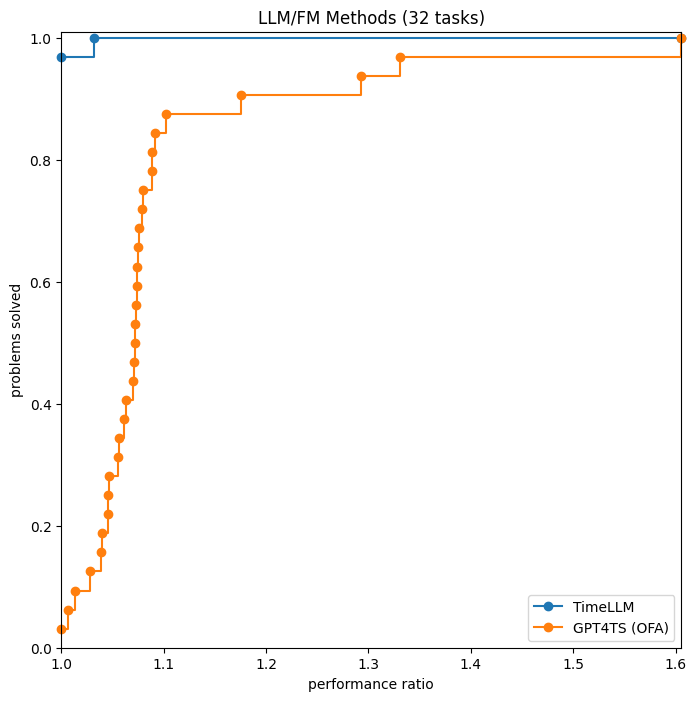

In [58]:
# PP for FM/LLMs
ax, num_problems, _, best_fm = make_pp(data, fm_methods)
ax.set_title(f"LLM/FM Methods ({num_problems} tasks)")

,Dataset,Horizon
0,ETTh1,96.0
1,ETTh1,192.0
2,ETTh1,336.0
3,ETTh1,720.0
5,ETTh2,96.0
6,ETTh2,192.0
7,ETTh2,336.0
8,ETTh2,720.0
30,ILI,24.0
31,ILI,36.0


Text(0.5, 1.0, 'DASH vs best-per-task in category')

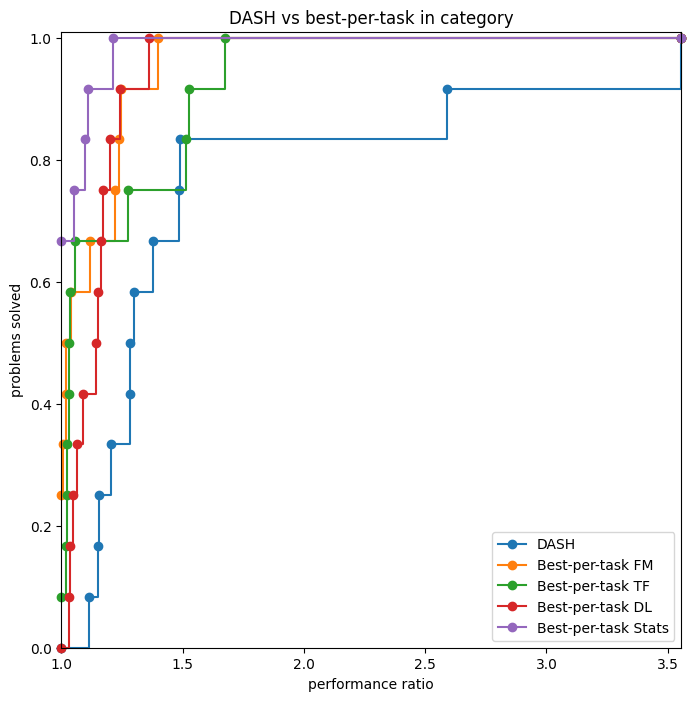

In [6]:
# DASH vs best-per-task
ax, num_problems, _, _ = make_pp(data, ["DASH", "Best-per-task FM", "Best-per-task TF", "Best-per-task DL", "Best-per-task Stats"])
ax.set_title("DASH vs best-per-task in category")

,Dataset,Horizon
0,ETTh1,96.0
1,ETTh1,192.0
2,ETTh1,336.0
3,ETTh1,720.0
5,ETTh2,96.0
6,ETTh2,192.0
7,ETTh2,336.0
8,ETTh2,720.0
30,ILI,24.0
31,ILI,36.0


Text(0.5, 1.0, 'DASH vs best-overall in category (12 Tasks)')

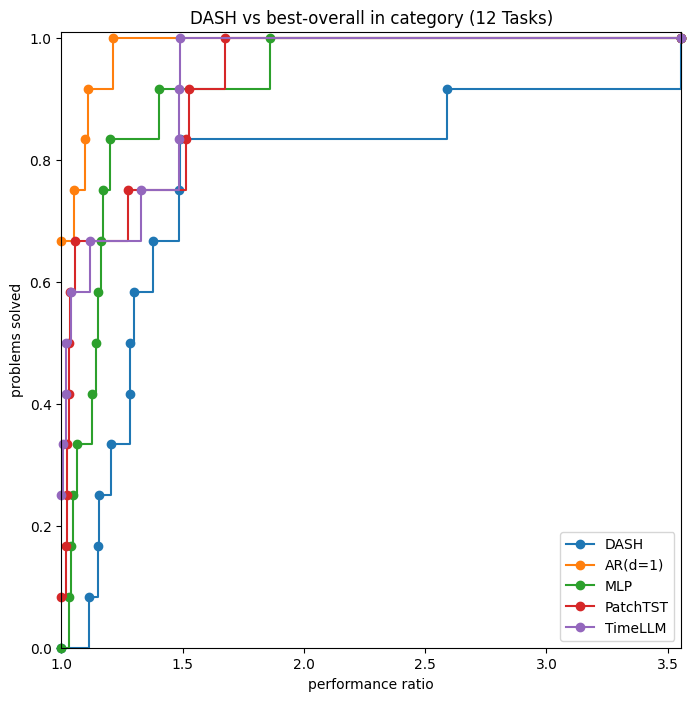

In [59]:
# DASH vas best-in-category (run after all the others)
final_contenders = ["DASH", best_stats, best_dl, best_tf, best_fm]
ax, num_problems, final_aupps, _ = make_pp(data, final_contenders)
ax.set_title(f"DASH vs best-overall in category ({num_problems} Tasks)")

In [19]:
# Final AUPP for DASH vs best-in-category
[(m, a) for m, a in zip(final_contenders, final_aupps)]

[('DASH', 2.0444139002207122),
 ('AR(d=1)', 2.249059515776541),
 ('DLinear', 2.1659002640895695),
 ('PatchTST/64', 2.456256723330833),
 ('TimeLLM', 2.4710445832753933)]

In [60]:
data[["Dataset", "diff"]]

KeyError: "['diff'] not in index"

In [41]:
data[["GPT4TS (OFA)", "LLM4TS", "MOMENT"]]

,GPT4TS (OFA),LLM4TS,MOMENT
0,0.376,0.371,0.387
1,0.416,0.403,0.410
2,0.442,0.420,0.422
3,0.477,0.422,0.454
5,0.285,0.269,0.288
6,0.354,0.328,0.349
7,0.373,0.353,0.369
8,0.406,0.383,0.403
10,0.292,0.285,0.293
11,0.332,0.324,0.326


In [49]:
((data["LLM4TS"] - data["AR(d=0)"])/data["AR(d=1)"]).mean()

-0.041895316002157776

In [65]:
np.nanmean(data[["TimeLLM", "GPT4TS (OFA)", "LLM4TS", "MOMENT"]].to_numpy() - data["AR(d=0)"].to_numpy()[:, None])

-0.03865476190476189